数据预处理
数据质量：缺失值处理、异常处理、重复数据
数据结构：格式转化、数据合并
先查看文件编码类型

In [48]:
import chardet

with open('D:\\Git-sub\\ItDSaE\\hw7_github_bot_raw_data.csv', 'rb') as file:
    enco = chardet.detect(file.read())
    print(enco['encoding'])


MacRoman


1. 删除重复数据，并输出去重前后的数据量

In [51]:
import pandas as pd

df = pd.read_csv('D:\\Git-sub\\ItDSaE\\hw7_github_bot_raw_data.csv',encoding=enco['encoding'],low_memory=False)

# 打印去重前的行数
print(f"去重前的数据量: {len(df)}")

# 删除重复数据
df_unique = df.drop_duplicates()

# 打印去重后的行数
print(f"去重后的数据量: {len(df_unique)}")


去重前的数据量: 20254
去重后的数据量: 19671


2. 缺失值处理
首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
最后，再次看各列有无缺失值

In [52]:

# 确保对 DataFrame 做复制操作
df_unique = df_unique.copy()

# 1. 去掉 gravatar_id 列
df_unique.drop(columns=['gravatar_id'], inplace=True)
# 去掉最后的unnamed列
df_unique = df_unique.drop(df_unique.columns[-8:], axis=1)

# 2. 查看各列的缺失值情况
print("去掉 gravatar_id 列后的缺失值情况：")
print(df_unique.isnull().sum())

# 3. 将可转化为布尔类型的列转化为布尔类型
boolean_columns = ['company','blog','location','email','hireable']
for col in boolean_columns:
    if col in df_unique.columns:
        df_unique.loc[:,col] = df_unique[col].fillna(False).astype(bool)  # 将缺失值填充为 False，并转换为布尔类型

#启用未来的行为处理
pd.set_option('future.no_silent_downcasting', True)

# 4. 文本数据列用空字符串填充缺失值
text_columns = df_unique.select_dtypes(include=['object']).columns  # 获取文本列
for col in text_columns:
    df_unique.loc[:,col] = df_unique[col].fillna('')  # 将缺失值填充为空字符串

# 5. 再次检查各列的缺失值情况
print("\n处理缺失值后的情况：")
print(df_unique.isnull().sum())


去掉 gravatar_id 列后的缺失值情况：
actor_id                   1
label                      7
login                      4
id                         4
node_id                    4
avatar_url                 6
url                        4
html_url                   9
followers_url              9
following_url              9
gists_url                  9
starred_url               11
subscriptions_url         11
organizations_url         11
repos_url                 11
events_url                11
received_events_url       11
type                      11
site_admin                11
name                    2580
company                 8933
blog                   11210
location                7063
email                  11702
hireable               16377
bio                    10893
twitter_username       14633
public_repos              33
public_gists              43
followers                 35
following                 40
created_at                30
updated_at               211
dtype: int64

处理缺失

3. 数据变换，将created_at、updated_at转为时间戳

In [54]:
# 将 'created_at' 和 'updated_at' 列转换为 datetime 类型
df_unique['created_at'] = pd.to_datetime(df_unique['created_at'], errors='coerce')
df_unique['updated_at'] = pd.to_datetime(df_unique['updated_at'], errors='coerce')

# 将 datetime 类型的列转换为 Unix 时间戳（即自1970年1月1日以来的秒数）
df_unique['created_at_timestamp'] = df_unique['created_at'].astype('int64') // 10**9  # 转为秒为单位
df_unique['updated_at_timestamp'] = df_unique['updated_at'].astype('int64') // 10**9  # 转为秒为单位

# 查看转换后的数据
print(df_unique[['created_at', 'created_at_timestamp', 'updated_at', 'updated_at_timestamp']].head())

df_result = df_unique

                 created_at  created_at_timestamp                updated_at  \
0 2011-09-26 17:27:03+00:00            1317058023 2023-10-13 11:21:10+00:00   
1 2015-06-29 10:12:46+00:00            1435572766 2023-10-07 06:26:14+00:00   
2 2008-08-29 16:20:03+00:00            1220026803 2023-10-02 02:11:21+00:00   
3 2014-05-20 18:43:09+00:00            1400611389 2023-10-12 12:54:59+00:00   
4 2012-08-16 14:19:13+00:00            1345126753 2023-10-06 11:58:41+00:00   

   updated_at_timestamp  
0            1697196070  
1            1696659974  
2            1696212681  
3            1697115299  
4            1696593521  


结果保存到hw7_result.csv中

In [55]:
df_result.to_csv('D:\\Git-sub\\ItDSaE\\hw7_result.csv', index=False)

4. 数据可视化

4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

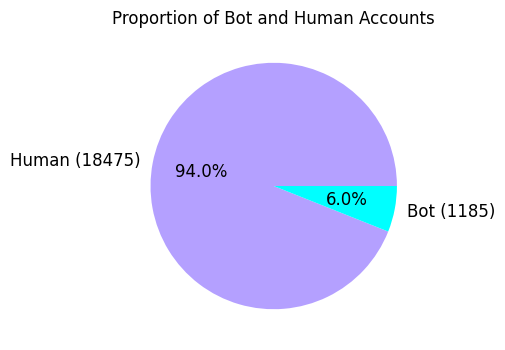

In [57]:
import matplotlib.pyplot as plt

# 计算“Human”和“Bot”账户的比例
type_counts = df_unique['label'].value_counts()

# 仅保留'Human'和'Bot'类型的比例
type_counts = type_counts[type_counts.index.isin(['Human', 'Bot'])]

# 为标签添加数量信息
labels_with_counts = [f'{label} ({count})' for label, count in zip(type_counts.index, type_counts.values)]

# 绘制饼图
plt.figure(figsize=(4, 4))
plt.pie(type_counts.values, labels=labels_with_counts, autopct='%1.1f%%', colors=["#B4A0FF","#00FFFF"], textprops={'fontsize': 12})

# 添加标题
plt.title('Proportion of Bot and Human Accounts')

# 显示饼图
plt.show()


选择原因：
饼图能够直观地展示不同类型账户的占比，适合分析分类数据。

结果分析：
Human类型账户占比90%以上，数量远超Bot类型，这表明GitHub上大多数用户为真实用户，而机器账户相对较少。

数据洞察：
通过这种可视化，可以分析是否存在某些异常情况，例如Bot类型账户是否占比过高，提示可能的数据污染问题。

4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

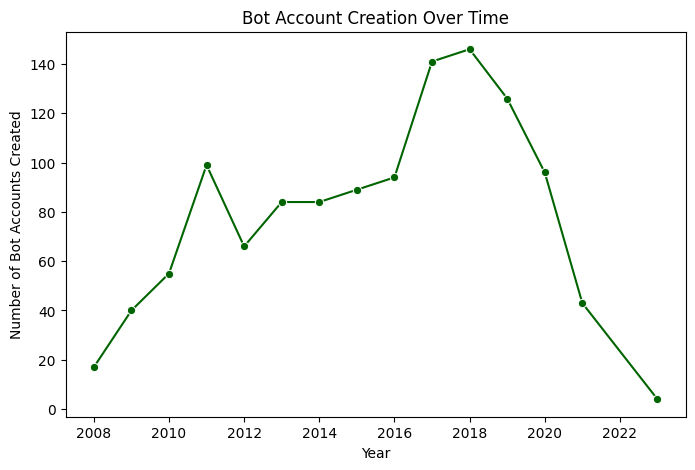

In [58]:
import seaborn as sns
# 过滤出bot类型的账号
df_bot = df_unique[df_unique['label'] == 'Bot']

# 确保df_bot是原始数据的副本
df_bot = df_bot.copy()

# 转换created_at为时间戳
df_bot.loc[:,'created_at'] = pd.to_datetime(df_bot['created_at'])

# 计算每年的创建账户数量
df_bot.loc[:,'year'] = df_bot['created_at'].dt.year
bot_created_year = df_bot['year'].value_counts().sort_index()

# 绘制时间序列图
plt.figure(figsize=(8, 5))
sns.lineplot(x=bot_created_year.index, y=bot_created_year.values, marker='o', color='darkgreen')
plt.title("Bot Account Creation Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Bot Accounts Created")
plt.show()


选择原因：
时间序列图适合展示随时间变化的数据，能够清晰看到Bot类型账户的创建趋势。

结果分析+数据洞察：
1.2008年至2012年：Bot账号数量逐渐上升，尤其在2010年到2012年之间出现了一个较为明显的峰值。
2008-2012年是GitHub成长的早期阶段，Bot账号的数量增长可能与GitHub的用户基数增长有关。这个时期Bot账号可能主要用于自动化工具的开发和使用，例如持续集成工具或其他自动化脚本。

2.2013年至2016年：Bot账号创建数量趋于稳定，数量浮动较小，基本保持在80-100个之间。
这一时期GitHub用户群可能增长趋于平稳，而Bot的需求也逐渐稳定。

3.2017年至2019年：Bot账号创建数量激增，2018年达到峰值，数量超过140。
GitHub在这一时期进一步扩展功能，支持更多的自动化和集成工具，例如GitHubActions（2018年推出Beta版）。开发者可能更频繁地使用Bot来自动化任务，例如PullRequest检查、代码审查、CI/CD流水线等，因此开源社区中机器人参与的需求显著增加。

4.2020年至2023年：Bot账号数量急剧下降，尤其在2021年以后减少到了不足40个，2023年几乎接近零。
可能原因：GitHub政策变化，对Bot账号的注册可能实施了更严格的限制，例如需要验证信息、注册审核等；自动化技术的变化，开发者可能逐渐采用其他工具或框架来代替GitHub上的Bot；数据异常，可能由于数据不完整，导致最近几年的Bot账号数量看似减少。

4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

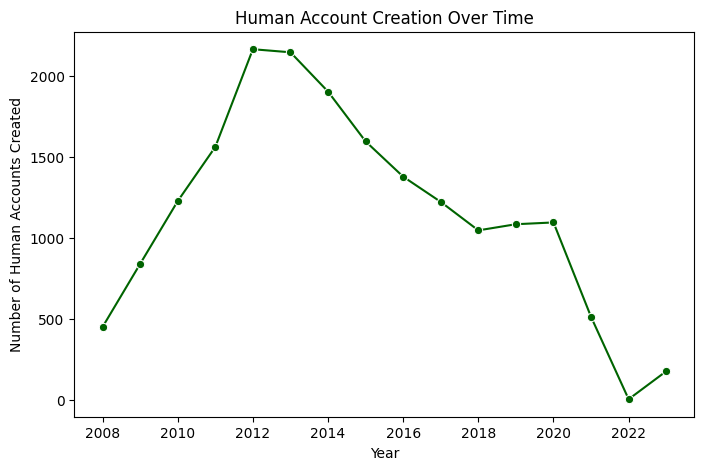

In [59]:
# 过滤出human类型的账号
df_human = df_unique[df_unique['label'] == 'Human']

# 确保df_human是原始数据的副本
df_human = df_human.copy()

# 转换created_at为时间戳
df_human.loc[:,'created_at'] = pd.to_datetime(df_human['created_at'])

# 计算每年的创建账户数量
df_human.loc[:,'year'] = df_human['created_at'].dt.year
human_created_year = df_human['year'].value_counts().sort_index()

# 绘制时间序列图
plt.figure(figsize=(8, 5))
sns.lineplot(x=human_created_year.index, y=human_created_year.values, marker='o', color='darkgreen')
plt.title("Human Account Creation Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Human Accounts Created")
plt.show()


选择原因：
时间序列图适合展示随时间变化的数据，能够清晰看到Human类型账户的创建趋势。

结果分析+数据洞察：
1.2008年至2012年：人类账号数量快速增长，2012年达到了一个高峰（约2000个账号）。
这一时期GitHub逐渐流行，成为开源社区和开发者的重要平台，用户量迅速增加。随着软件开发行业的扩大，越来越多的开发者开始使用GitHub来托管代码和协作开发。

2.2013年至2016年：账号创建数量开始逐步下降，但仍保持较高的水平。
GitHub用户增长的速度趋于稳定，大量早期开发者已经注册，新增用户数量减少。部分开发者可能转向其他平台，例如Bitbucket或GitLab。

3.2017年至2019年：人类账号的创建量逐渐减少，年度新增数量从1500左右下降到1000以下。
GitHub的用户市场接近饱和，新用户增长变慢。技术行业增长趋于平稳，开发者人数的增加不如早期显著。

4.2020年至2021年：账号创建数量急剧下降，尤其在2021年，几乎接近0。
可能原因：GitHub政策变化，GitHub对账号注册和验证可能增加了限制（例如需要验证邮箱或电话）；疫情的影响，全球COVID-19疫情可能对某些领域的开发者活动产生了限制；数据缺失，这一急剧下降可能是由于数据不完整或采集不足导致的。

5.2022年至2023年：人类账号的创建量开始小幅回升。
GitHub的功能扩展（例如GitHub Actions和Copilot）吸引了新用户，同时更多新兴市场的开发者开始使用GitHub。

4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

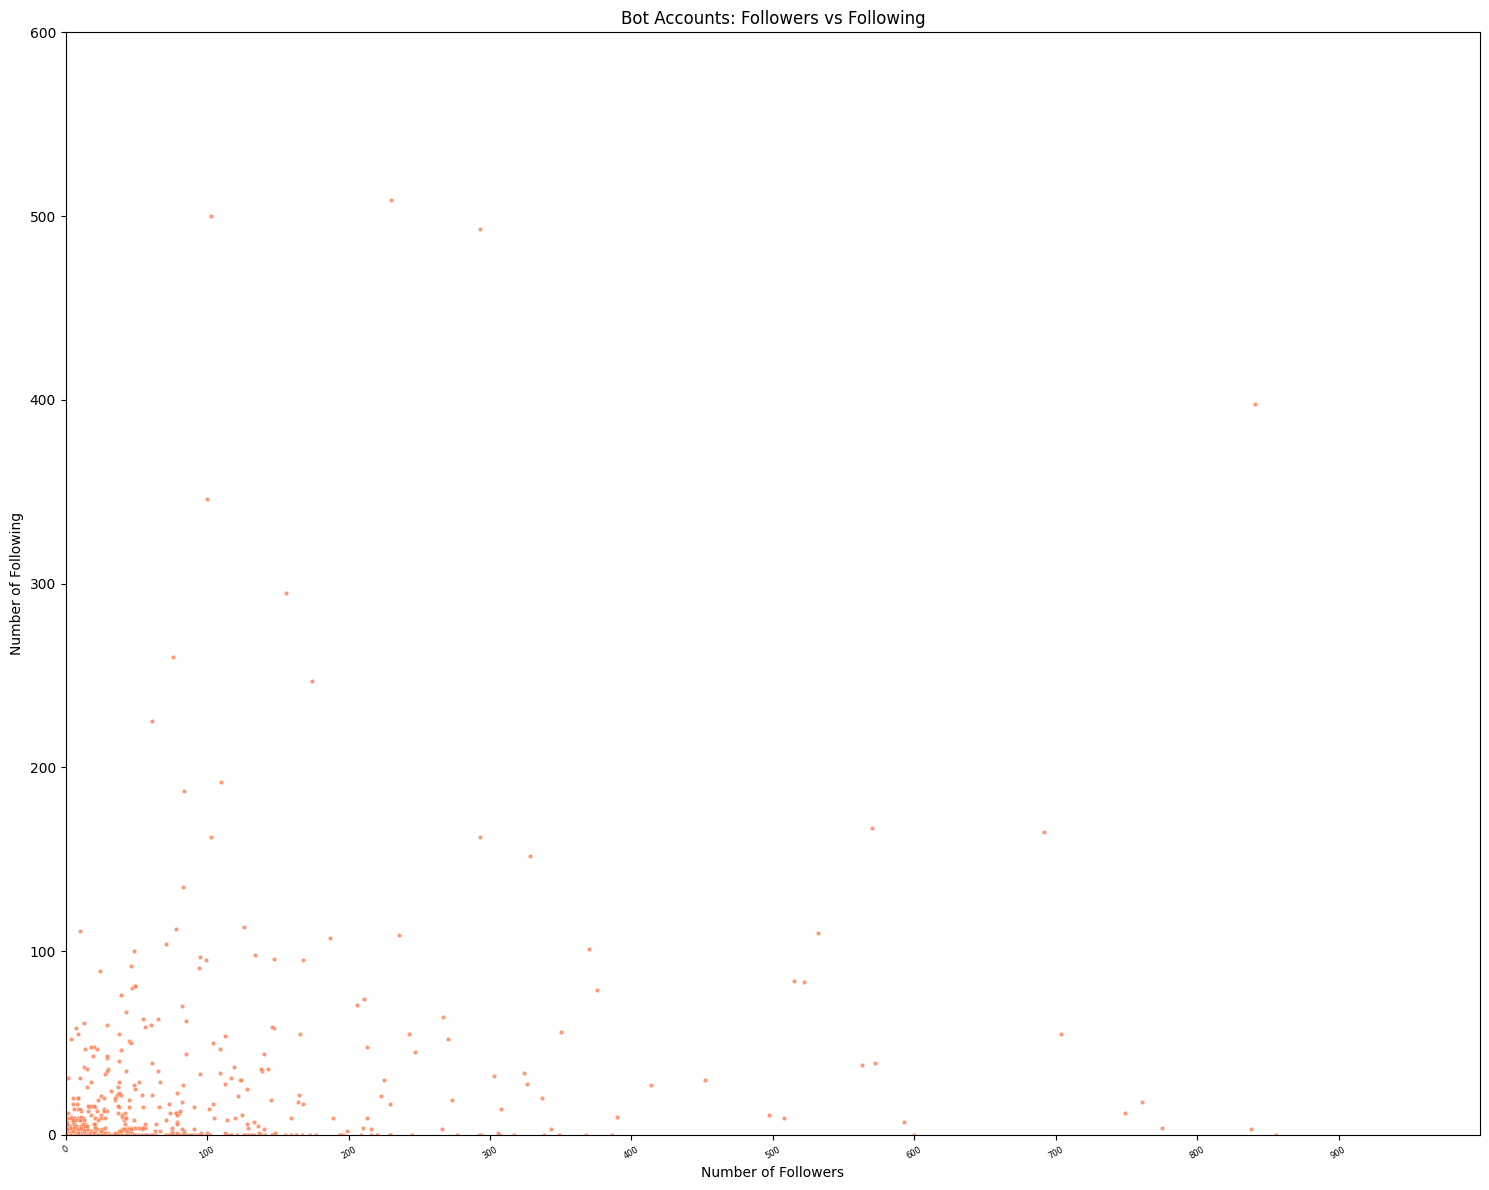

In [60]:
# 过滤
# 确保 'followers' 和 'following' 列仅包含数值数据
df_bot['followers'] = pd.to_numeric(df_bot['followers'], errors='coerce')
df_bot['following'] = pd.to_numeric(df_bot['following'], errors='coerce')

# 过滤掉 NaN 值（那些原本为非数值的数据会变为 NaN）
df_bot_cleaned = df_bot.dropna(subset=['followers', 'following'])

# 绘制散点图
plt.figure(figsize=(15, 12))
sns.scatterplot(data=df_bot, x='followers', y='following', color='coral',alpha=0.8,s=10)
# 限制横轴和纵轴范围
plt.xlim(0, 1000)
plt.ylim(0, 600)

plt.title("Bot Accounts: Followers vs Following")
plt.xlabel("Number of Followers")
plt.ylabel("Number of Following")
# 调整横轴的刻度（减少过多的标签）
plt.xticks(ticks=range(0, 1000, 100),fontsize=6,rotation=30)  # 每隔 200 设置一个刻度
plt.tight_layout()  # 自动调整布局以防止标签重叠
plt.show()

选择原因：
散点图能够直观展示Bot的followers和following之间的关系，帮助理解这些账户的社交网络结构。

结果分析：
大部分数据点集中在左下角，followers数量大部分集中在0-100范围内。following数量大部分集中在0-100范围内。
少数数据点在followers>500和following>300的区域出现，说明存在一些"异常"或"特殊"的Bot账号。
只有少数Bot的followers达到800左右。而following数量超过500的点极为稀少，说明这种行为并不常见。
同时，关注者（followers）少的Bot通常也关注更少的对象（following），随着followers增加，following的数量并没有呈现显著的增长趋势。

数据洞察：
1.绝大多数Bot的社交网络活跃度较低：
从图表中可以看到，大部分Bot的followers和following都在100以下，这说明大部分Bot并不是为建立复杂社交网络而创建的。
这些Bot很可能是用于简单的自动化任务，比如监控仓库、触发自动化流程，或者仅是开发者用来测试的账号。
2少数Bot表现出高关注者和高关注对象的特性：
一些Bot显然更活跃，在followers>500或following>300的区域出现。
这类Bot可能被设计用于执行更复杂的任务，比如：模拟人类用户行为，与更多账户互动；或提高某些项目或用户的可见性（例如通过大量关注特定用户来吸引注意）。
3.“互相关注”行为的迹象：
散点图中有部分点接近followers≈following的区域。这可能表明一些Bot是通过“互相关注”的方式扩展其社交网络。
这种模式在实际中可能出于以下目的：提高自身的社交影响力；或模仿真实用户行为，避免被识别为Bot。

4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

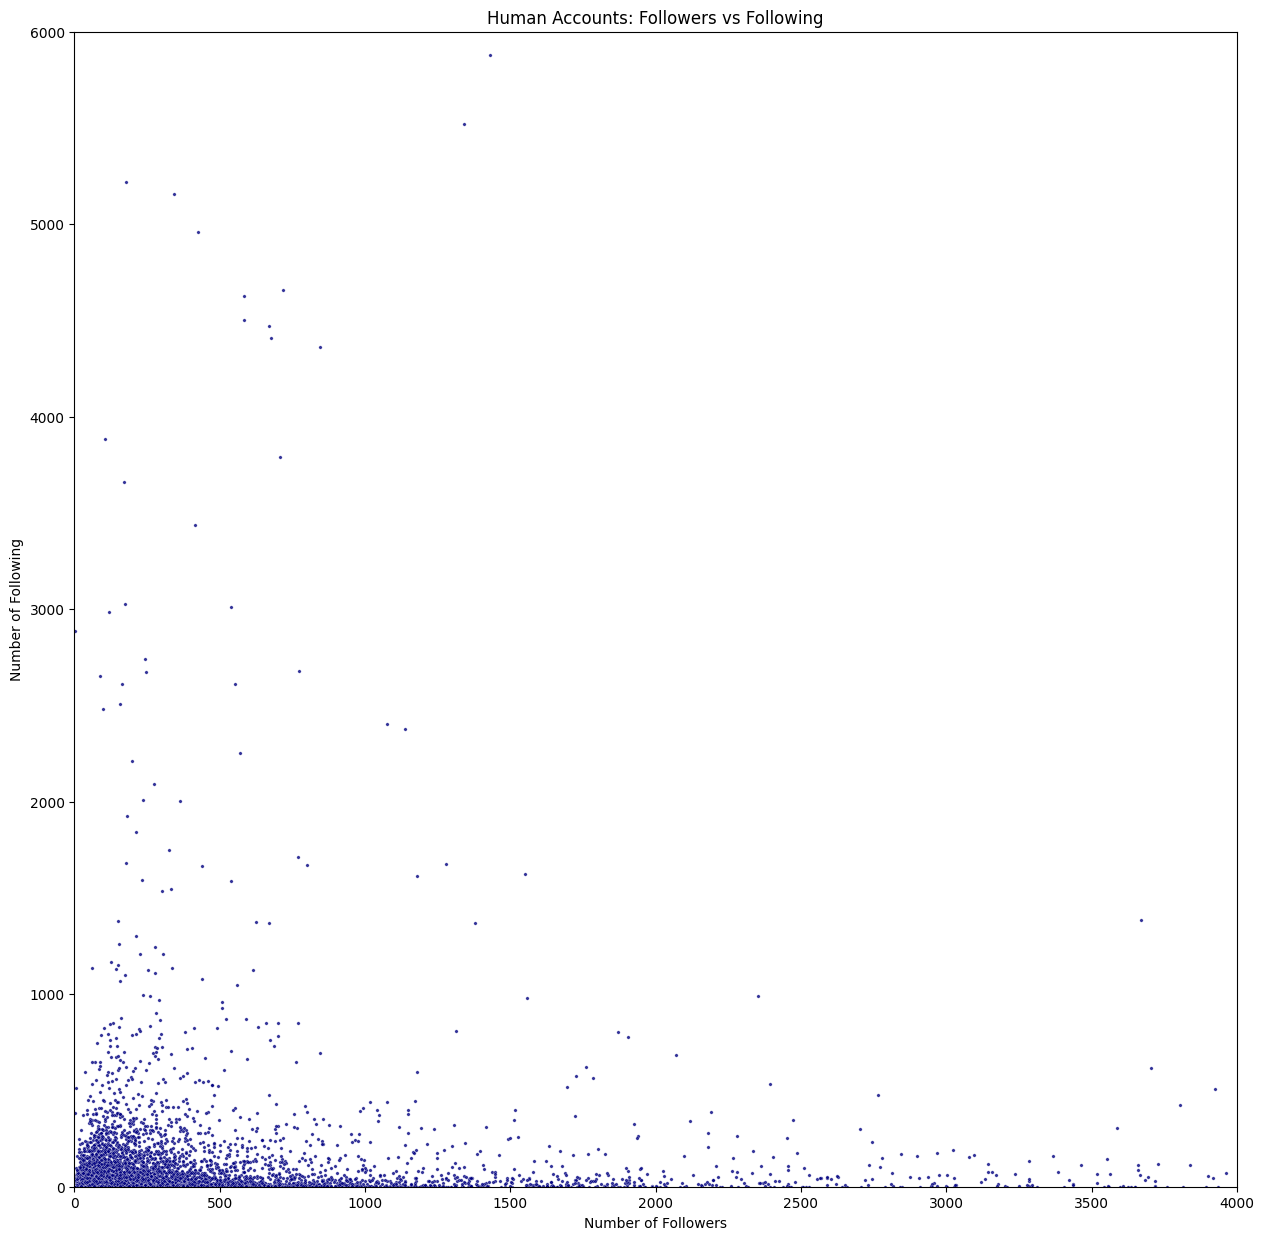

In [61]:
# 过滤
# 确保 'followers' 和 'following' 列仅包含数值数据
df_human['followers'] = pd.to_numeric(df_human['followers'], errors='coerce')
df_human['following'] = pd.to_numeric(df_human['following'], errors='coerce')

# 过滤掉 NaN 值（那些原本为非数值的数据会变为 NaN）
df_human_cleaned = df_human.dropna(subset=['followers', 'following'])

plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_human, x='followers', y='following',color='navy',alpha=0.8,s=6)

# 限制横轴和纵轴范围
plt.xlim(0, 4000)
plt.ylim(0, 6000)

plt.title("Human Accounts: Followers vs Following")
plt.xlabel("Number of Followers")
plt.ylabel("Number of Following")
plt.show()

选择原因：
散点图同样适合展示人类账户之间followers和following数量的关系，能清晰地看出哪些用户的社交网络更为活跃。

结果分析：
1.主要分布特性：
大部分数据点集中在左下角,绝大多数人类账户的followers和following都在500以下，说明大部分账户的社交活动范围较小。
少量数据点显示followers和following高于1000，甚至有一些极端值超出5000的范围，这些可能是社交网络中非常活跃或知名的用户（例如开源项目维护者、大量关注的开发者）。
2.极端值点：
存在少数following超过5000的点（甚至接近6000），这些账户可能是异常值，也可能是一些特别活跃的用户（如自动化关注账号或社交媒体类型用户）;followers达到3000以上的账户较为稀少，说明拥有较多关注者的用户是社交网络中的核心节点。
3.分布趋势：
随着followers数量增加，following的分布变得更加分散。这表明大部分高关注者的用户并不一定会关注大量对象。

数据洞察：
1.普通用户的特点：
大部分用户（超过80%）的followers和following都在500以下。
这些用户可能是开发者或小规模的开源项目参与者，参与社区的社交活动较少。
2.高关注者和高关注对象用户：
高followers用户：存在少量followers>1000的账户，这些可能是开源社区中的核心开发者或受欢迎的内容创作者。
高following用户：少量following>1000的用户可能是某些在社交层面非常活跃的人类用户，或者是关注了大量其他账户的“网络型”用户。
3.互相关注行为：
followers≈following的分布显示部分用户可能通过互相关注来扩展其社交网络，这在开源社区中可能是为了建立合作关系或提高项目的可见性。
4.极端值需要关注：
极端值点（如following>5000或followers>4000的账户）需要进一步调查：这些账户可能是特殊用途的用户（例如社交媒体账号）;可能是异常数据，或者数据中的自动化行为的体现。